<a href="https://colab.research.google.com/github/lukassso/python-mini-projects/blob/master/time_series_forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import tensorflow as tf
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('GOOG.csv',
                 index_col='Date',
                 parse_dates=True)
df.info()
df.tail(20)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4006 entries, 2004-08-19 to 2020-07-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4006 non-null   float64
 1   High       4006 non-null   float64
 2   Low        4006 non-null   float64
 3   Close      4006 non-null   float64
 4   Adj Close  4006 non-null   float64
 5   Volume     4006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.1 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-19,1444.000000,1447.800049,1421.349976,1431.719971,1431.719971,3157900
2020-06-22,1429.000000,1452.750000,1423.209961,1451.859985,1451.859985,1542400
2020-06-23,1455.640015,1475.941040,1445.239990,1464.410034,1464.410034,1429800
2020-06-24,1461.510010,1475.420044,1429.750000,1431.969971,1431.969971,1756000
2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500
2020-06-26,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4267700
2020-06-29,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200
2020-06-30,1390.439941,1418.650024,1383.959961,1413.609985,1413.609985,2042400
2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200


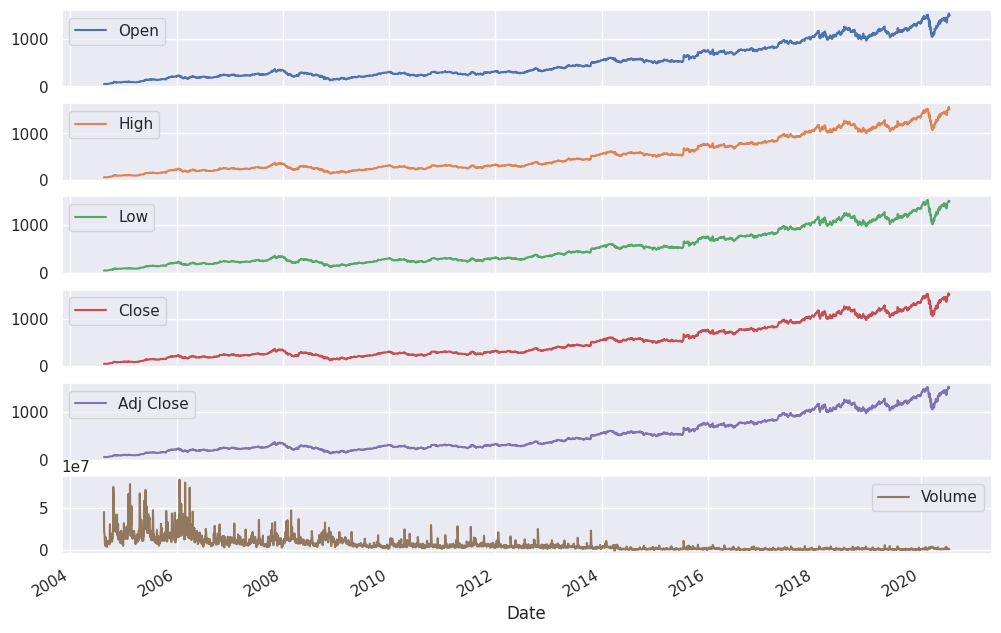

In [ ]:
ax1 = df.plot(figsize=(12, 8), subplots=True)

In [ ]:
df.drop(columns='Volume', inplace=True)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
features = data_scaled
target = data_scaled[:, 0]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, shuffle=False)
x_train.shape, x_test.shape

((3004, 5), (1002, 5))

In [ ]:
n_features = df.shape[1]
n_window = 60
batch_size = 64
gen_train = TimeseriesGenerator(x_train, y_train, length=n_window, batch_size=batch_size)
gen_test = TimeseriesGenerator(x_test, y_test, length=n_window, batch_size=batch_size)

In [ ]:
model = Sequential()
model.add(Input((n_window, n_features)))
#model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(8, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 32)         │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8)              │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,537 (353.66 KB)

 Trainable params: 90,537 (353.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
fit = model.fit(gen_train, epochs=500,
                validation_data=gen_test, callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)])

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0054 - mae: 0.0638 - val_loss: 0.0223 - val_mae: 0.1353
Epoch 2/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1462e-04 - mae: 0.0117 - val_loss: 0.0134 - val_mae: 0.1004
Epoch 3/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4702e-04 - mae: 0.0090 - val_loss: 0.0082 - val_mae: 0.0747
Epoch 4/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7274e-05 - mae: 0.0071 - val_loss: 0.0071 - val_mae: 0.0678
Epoch 5/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6061e-04 - mae: 0.0093 - val_loss: 0.0056 - val_mae: 0.0579
Epoch 6/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2450e-04 - mae: 0.0086 - val_loss: 0.0065 - val_mae: 0.0657
Epoch 7/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5050e-04 - mae: 0.0096 - val_loss: 0.0046 - val_mae: 0.0542
Epoch 8/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2614e-04 - mae: 0.0087 - val_loss: 0.0046 - val_mae: 0.0537
Epoch 9/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1

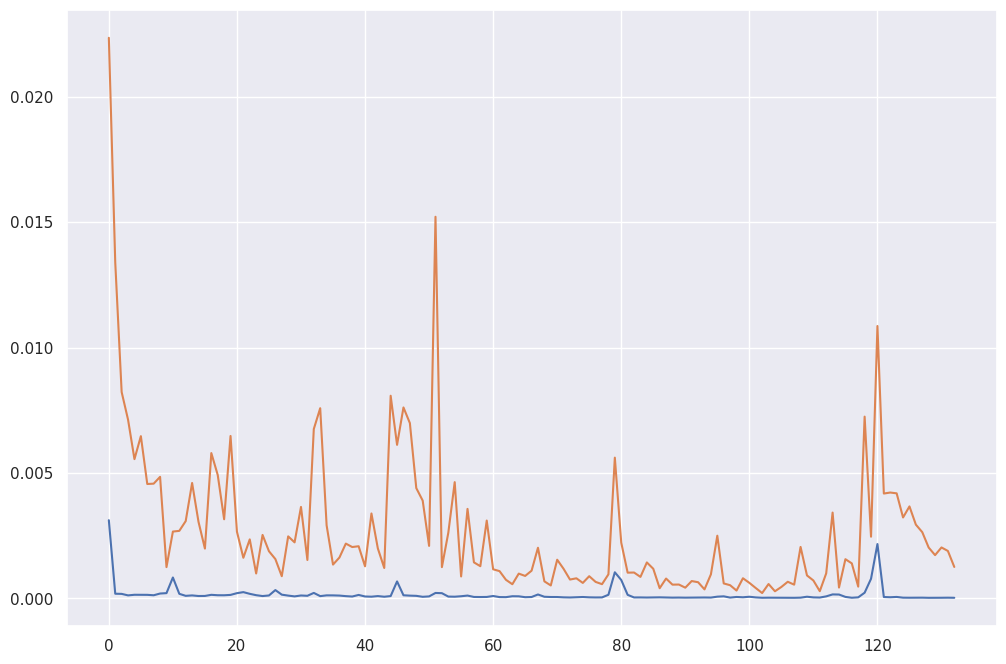

In [ ]:
train_loss= fit.history['loss']
val_loss= fit.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(range(len(train_loss)), train_loss)
plt.plot(range(len(val_loss)), val_loss);

In [ ]:
test_mse, test_mae = model.evaluate(gen_test, verbose=0)
print(f"test MSE: {test_mse}\ntest MAE: {test_mae}")

test MSE: 0.00021120798191986978
test MAE: 0.010189863853156567


In [ ]:
test_pred = model.predict(gen_test, verbose=0)
test_pred_true = scaler.inverse_transform(np.append(test_pred, x_test[n_window:, 1:], axis=1))[:, 0]
test_pred_true.shape

(942,)

In [ ]:
df_fin = df[-test_pred_true.shape[0]:]
df_fin.insert(5, 'PredOpen', test_pred_true)
df_fin

,Open,High,Low,Close,Adj Close,PredOpen
Date,,,,,,
2016-10-19,798.239990,804.599976,798.030029,801.500000,801.500000,795.970244
2016-10-20,803.299988,803.969971,796.030029,796.969971,796.969971,805.421416
2016-10-21,795.000000,799.500000,794.000000,799.369995,799.369995,811.108953
2016-10-24,804.900024,815.179993,804.820007,813.109985,813.109985,811.688270
2016-10-25,816.679993,816.679993,805.140015,807.669983,807.669983,815.357097
...,...,...,...,...,...,...
2020-07-13,1550.000000,1577.131958,1505.243042,1511.339966,1511.339966,1461.297720
2020-07-14,1490.310059,1522.949951,1483.500000,1520.579956,1520.579956,1468.454701
2020-07-15,1523.130005,1535.329956,1498.000000,1513.640015,1513.640015,1462.707149


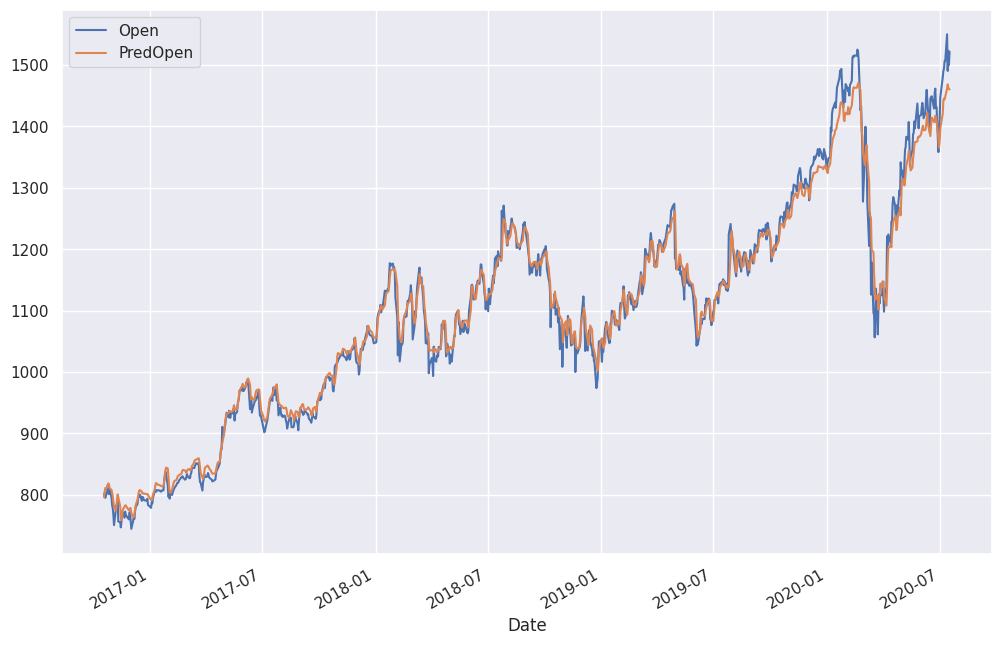

In [ ]:
df_fin[["Open", "PredOpen"]].plot(figsize=(12, 8));